In [8]:
%pip install pandas seaborn matplotlib numpy


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
# Data Loading 

current_dir = os.getcwd()
data_folder = os.path.join(current_dir, '../data')

# Load the data from the CSV file
benin_data = pd.read_csv(os.path.join(data_folder, 'benin-malanville.csv'))
sierra_leone_data = pd.read_csv(os.path.join(data_folder, 'sierraleone-bumbuna.csv'))
togo_data  = pd.read_csv(os.path.join(data_folder, 'togo-dapaong_qc.csv'))

In [15]:
# data cleaning before analysis
def clean_data(data):

    # This function performs data cleaning on the input DataFrame:
    # 1. Replaces inf and -inf values with NaN
    # 2. Converts the 'Timestamp' column to datetime format, handling conversion errors
    # 3. Fills missing values in numeric columns with the column mean
    # 4. Removes any duplicate rows
    # 5. Drops columns that have NaN values for all rows

    data = data.replace([np.inf, -np.inf], np.nan)
    data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")

    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

    data.drop_duplicates(inplace=True)
    
    null_columns = data.columns[data.isnull().sum() == len(data)]
    data.drop(columns = null_columns, inplace=True)

    return data

In [19]:
def perform_EDA(data, location_name):
    data = clean_data(data)

    if(data.empty):
        print(f"No Available data after cleaning for {location_name}")
        return 
    # perform eda analysis   
    data.set_index('Timestamp', inplace=True)

    # 1. Summary Statistics
    summary_stats = data.describe()
    print(f"\nSummary statistics for {location_name}:")
    print(summary_stats)
    
    # 2. Data Quality Check
    missing_values = data.isnull().sum()
    print(f"\nMissing values for {location_name}:")
    print(missing_values)
    # 4. Correlation Analysis
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {location_name}")
    plt.show()
     # 5. Wind Analysis
    wind_variables = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[wind_variables])
    plt.title(f"Wind Speed and Direction for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()
    
    # 6. Temperature Analysis
    temp_variables = ['TModA', 'TModB', 'Tamb']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[temp_variables])
    plt.title(f"Module and Ambient Temperatures for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.show()
     # 7. Histograms
    histogram_variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    for var in histogram_variables:
        plt.figure(figsize=(12, 6))
        sns.histplot(data[var], kde=True)
        plt.title(f"Histogram of {var} for {location_name}")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.show()
    # 8. Box Plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[variables])
    plt.title(f"Box Plot for {location_name}")
    plt.show()
        # 9. Scatter Plots
    scatter_pairs = [('GHI', 'Tamb'), ('WS', 'WSgust')]
    for x, y in scatter_pairs:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=data, x=x, y=y, hue='Precipitation', palette='viridis', s=20)
        plt.title(f"Scatter Plot of {x} vs {y} for {location_name}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()








Summary statistics for sierraleone-bumbuna.csv:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000   

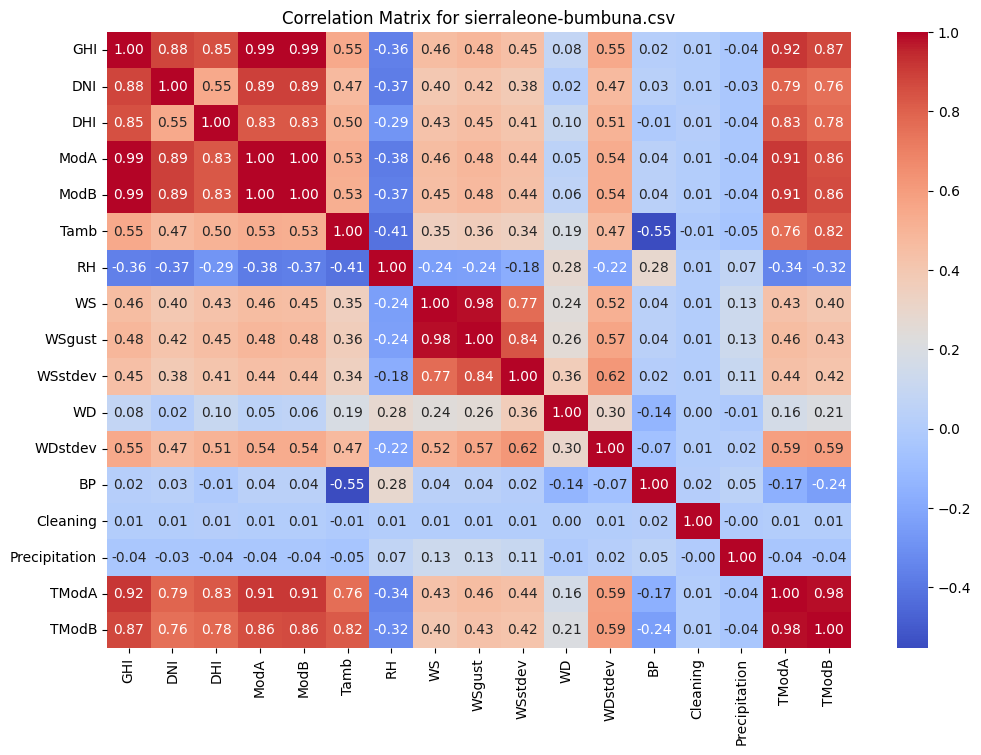

In [22]:
perform_EDA(benin_data, "sierraleone-bumbuna.csv")